In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy import stats


In [65]:
df=pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [66]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [67]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [68]:
df['LSTAT'].fillna(df['LSTAT'].mean(), inplace=True)

df['AGE'].fillna(df['AGE'].mean(), inplace=True)
df['ZN'].fillna(df['ZN'].mean(), inplace=True)
df['INDUS'].fillna(df['INDUS'].mean(), inplace=True)
df['CHAS'].fillna(df['CHAS'].mean(), inplace=True)
df['CRIM'].fillna(df['CRIM'].mean(), inplace=True)


In [69]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

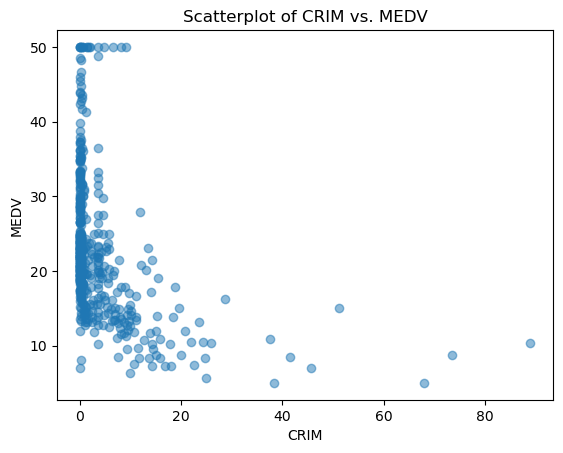

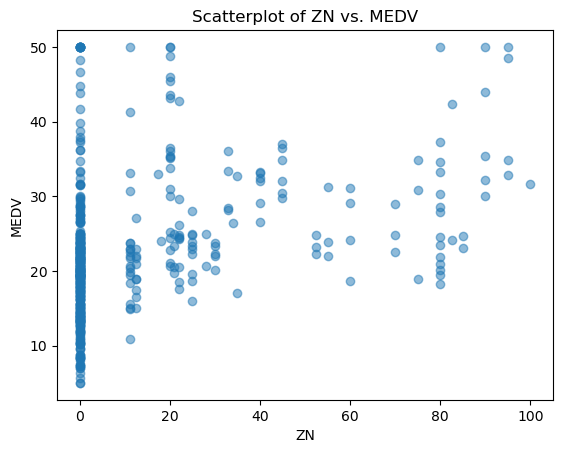

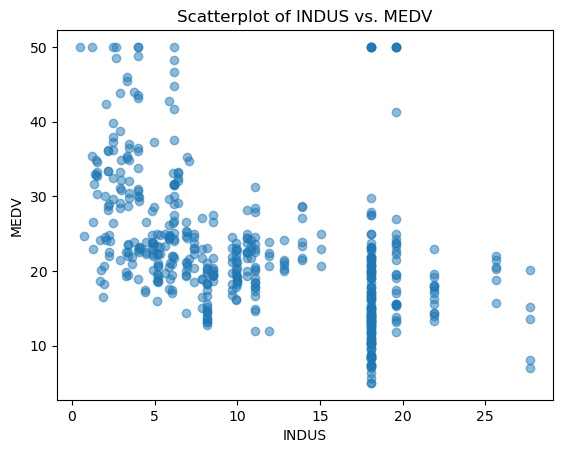

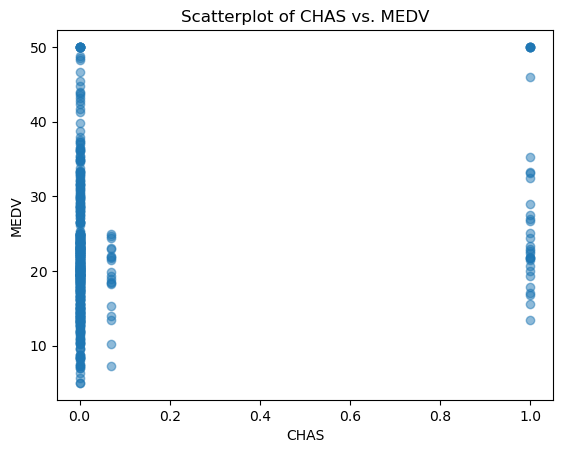

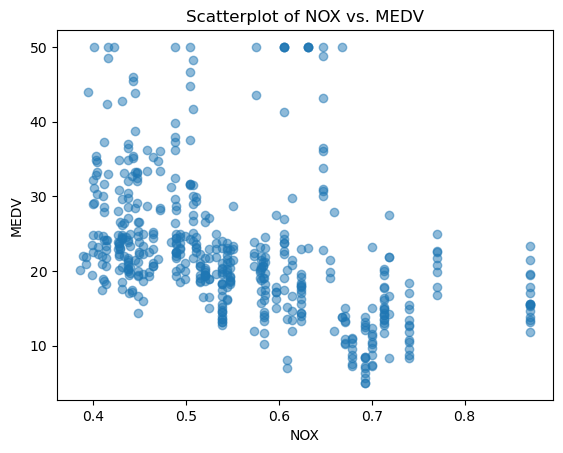

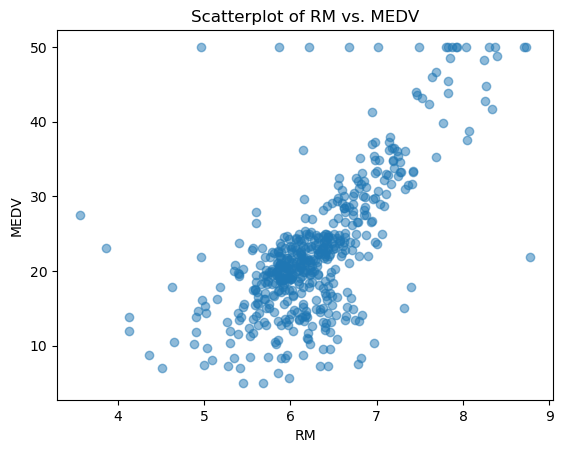

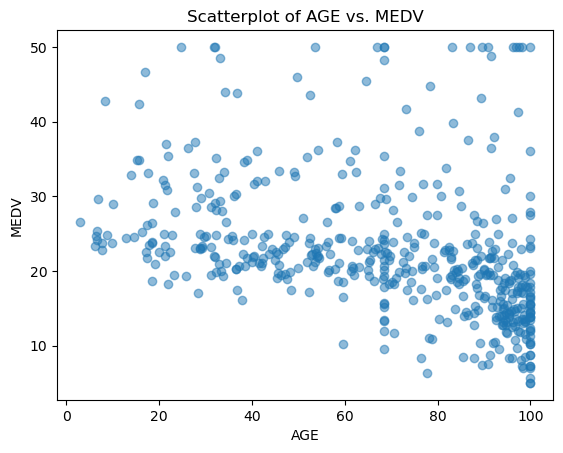

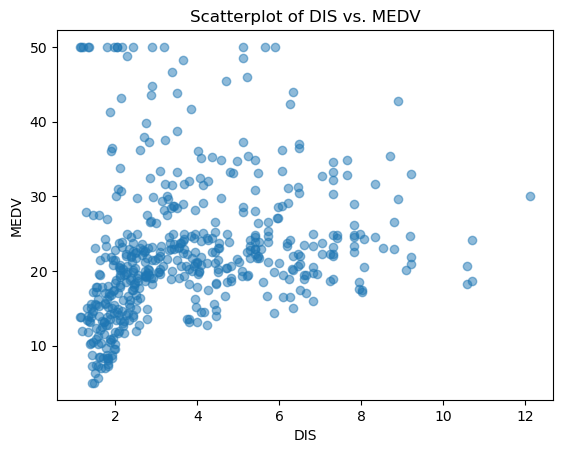

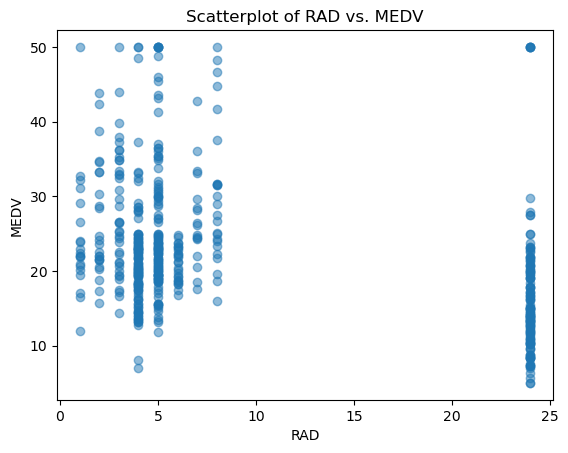

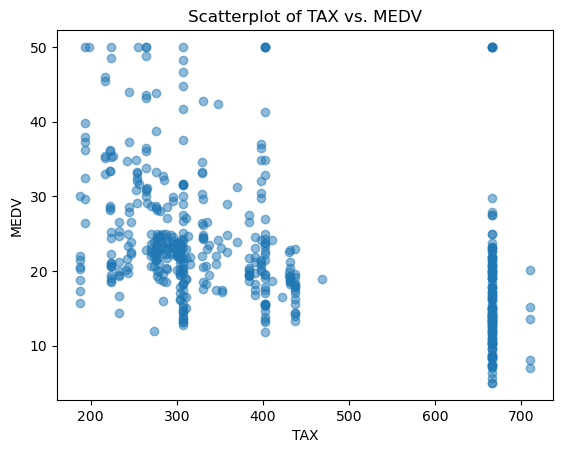

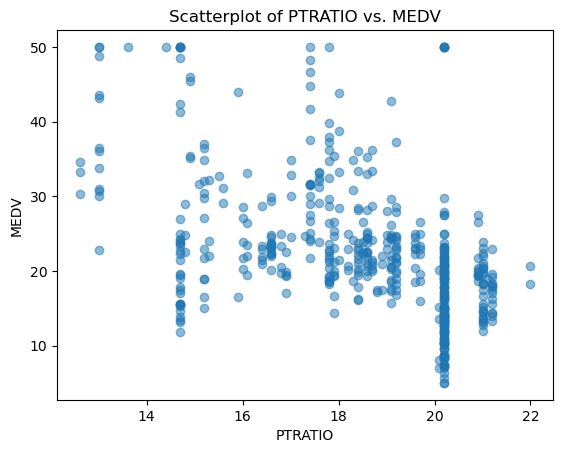

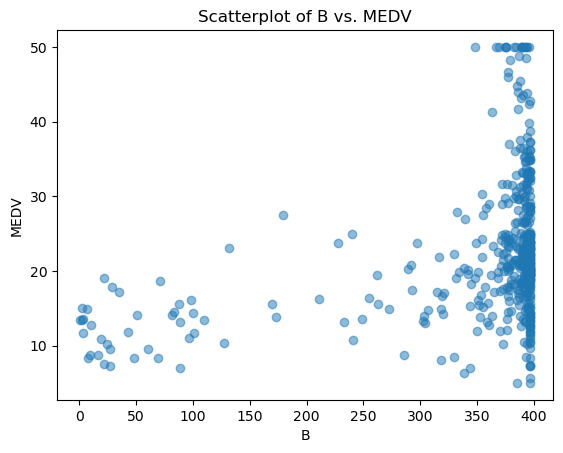

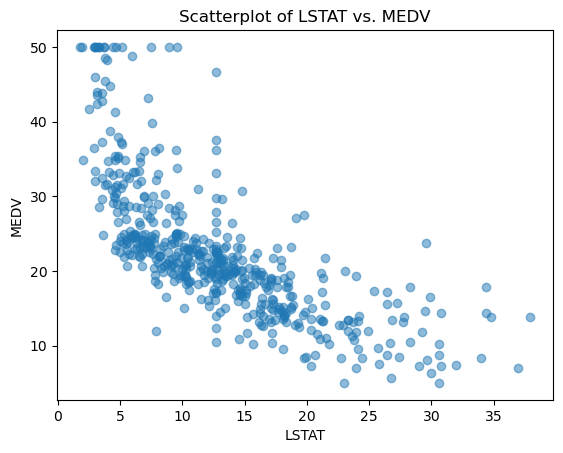

In [70]:
for col in df.columns:
    if col != 'MEDV':
        plt.scatter(df[col], df['MEDV'], alpha=0.5)
        plt.xlabel(col)
        plt.ylabel('MEDV')
        plt.title(f'Scatterplot of {col} vs. MEDV')
        plt.show()

In [87]:
X=df.drop(columns=['MEDV','RM','PTRATIO','TAX', 'NOX','AGE','B','INDUS'],axis=1).copy()


In [88]:
# Assumption 5: No Multicollinearity

# Calculate the Variance Inflation Factor (VIF) for each independent variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF:")
print(vif)

VIF:
  Variable       VIF
0     CRIM  1.971979
1       ZN  2.146041
2     CHAS  1.064733
3      DIS  3.823200
4      RAD  3.605278
5    LSTAT  4.204823


In [89]:
df.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [90]:
Y = df['MEDV']

In [91]:
scaler = StandardScaler()

# Fit the scaler to your data and transform the data
X_scaled = scaler.fit_transform(X)


In [92]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


In [93]:
X_scaled_df.head()

,CRIM,ZN,CHAS,DIS,RAD,LSTAT
0,-0.422328,0.296443,-0.279851,0.140214,-0.982843,-1.104146e+00
1,-0.419870,-0.489639,-0.279851,0.557160,-0.867883,-5.103527e-01
2,-0.419872,-0.489639,-0.279851,0.557160,-0.867883,-1.239748e+00
3,-0.419277,-0.489639,-0.279851,1.077737,-0.752922,-1.395333e+00
4,-0.414981,-0.489639,-0.279851,1.077737,-0.752922,2.535550e-16


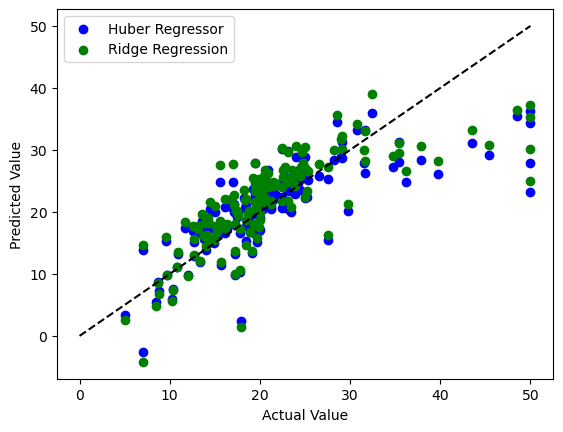

In [135]:
import pandas as pd
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
  

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, Y, test_size=0.3, random_state=42)
huber_regressor = HuberRegressor(epsilon=1.3)
huber_regressor.fit(X_train, y_train)

# Fit a Ridge Regression to the training data
ridge_regressor = Ridge(alpha=6)
ridge_regressor.fit(X_train, y_train)
  
# Make predictions on the test data
y_pred_huber = huber_regressor.predict(X_test)
y_pred_ridge = ridge_regressor.predict(X_test)
  
plt.scatter(y_test, y_pred_huber, color='blue', label='Huber Regressor')
plt.scatter(y_test, y_pred_ridge, color='green', label='Ridge Regression')
plt.plot([0, 50], [0, 50], 'k--')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()

Mean Squared Error - Huber Regressor: 31.64
Mean Squared Error - Ridge Regression: 32.48


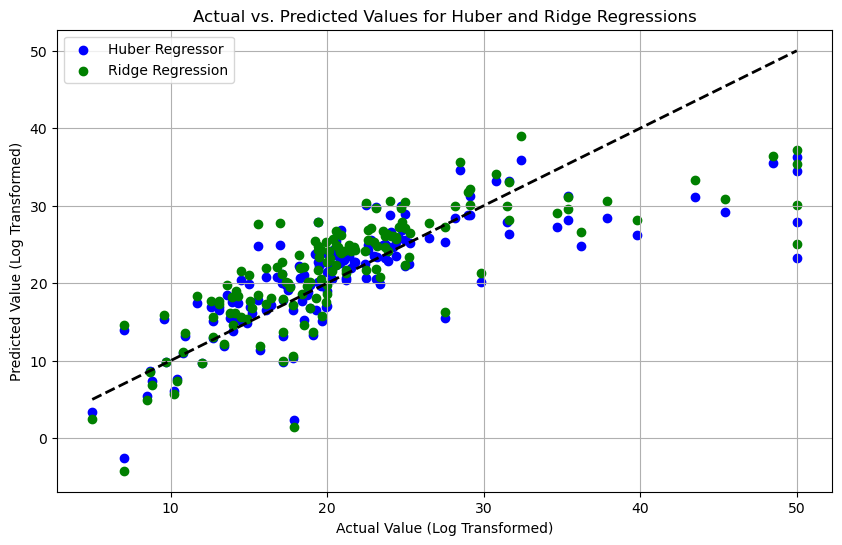

In [136]:
# Calculate the mean squared error
mse_huber = mean_squared_error(y_test, y_pred_huber)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
  
# Print the mean squared error
print("Mean Squared Error - Huber Regressor: {:.2f}".format(mse_huber))
print("Mean Squared Error - Ridge Regression: {:.2f}".format(mse_ridge))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_huber, color='blue', label='Huber Regressor')
plt.scatter(y_test, y_pred_ridge, color='green', label='Ridge Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Value (Log Transformed)')
plt.ylabel('Predicted Value (Log Transformed)')
plt.legend()
plt.title('Actual vs. Predicted Values for Huber and Ridge Regressions')
plt.grid(True)
plt.show()

In [137]:
y_pred_huber = huber_regressor.predict(X_train)
y_pred_ridge = ridge_regressor.predict(X_train)
residuals_huber = y_train - y_pred_huber
residuals_ridge = y_train - y_pred_ridge


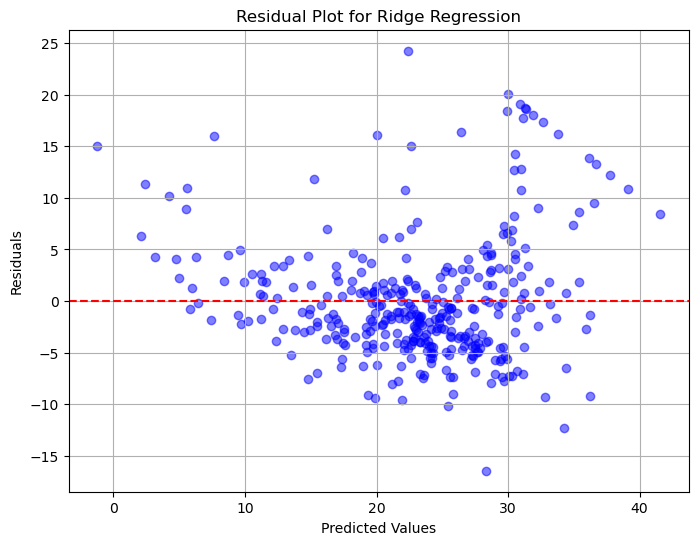

In [138]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_ridge, residuals_ridge, c='blue', marker='o', alpha=0.5)
plt.title("Residual Plot for Ridge Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.grid()
plt.show()




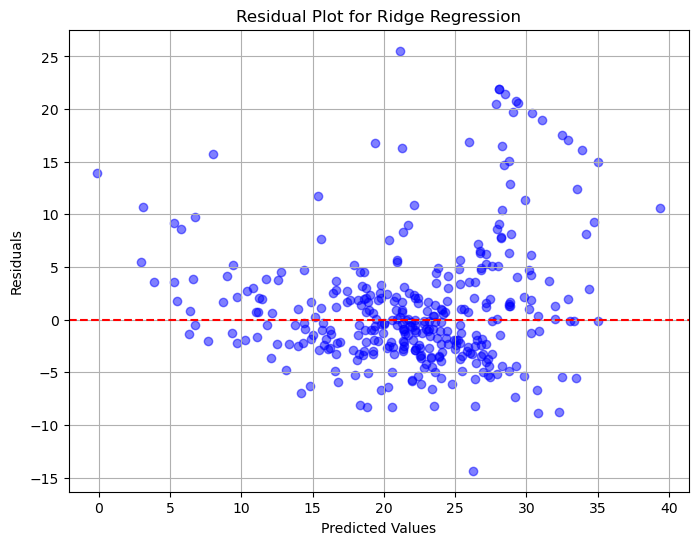

In [139]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_huber, residuals_huber, c='blue', marker='o', alpha=0.5)
plt.title("Residual Plot for Ridge Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.grid()
plt.show()



In [140]:

mean_residuals_huber = np.mean(residuals_huber)
std_residuals_huber = np.std(residuals_huber)

# Standardize the residuals
standardized_residuals_huber = (residuals_huber - mean_residuals_huber) / std_residuals_huber

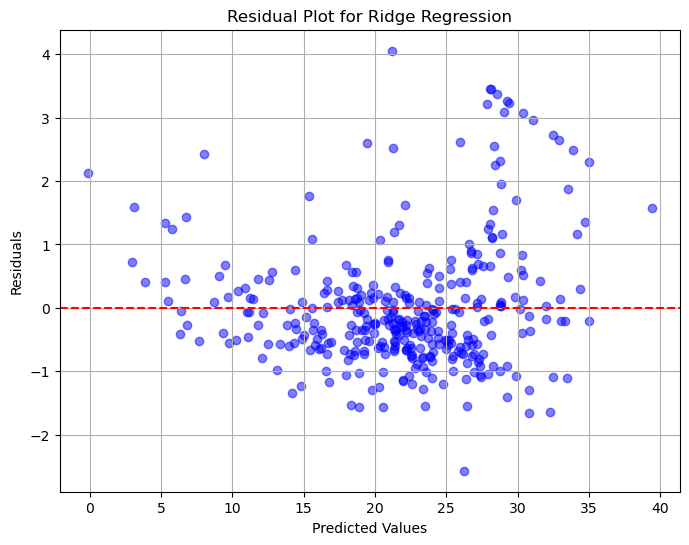

In [141]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_huber, standardized_residuals_huber, c='blue', marker='o', alpha=0.5)
plt.title("Residual Plot for Ridge Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.grid()
plt.show()